In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,header = None,names = ['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


from matplotlib import pyplot as plt
_df_0['Exam 1'].plot(kind='hist', bins=20, title='Exam 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Exam 2'].plot(kind='hist', bins=20, title='Exam 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Admitted'].plot(kind='hist', bins=20, title='Admitted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Exam 1', y='Exam 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Exam 2', y='Admitted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Admitted']
  ys = series['Exam 1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('Exam 1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Admitted']
  ys = series['Exam 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('Exam 2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Admitted']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Admitted'}, axis=1)
              .sort_values('Admitted', ascending=True))
  xs = counted['Admitted']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Exam 1'].plot(kind='line', figsize=(8, 4), title='Exam 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Exam 2'].plot(kind='line', figsize=(8, 4), title='Exam 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Admitted'].plot(kind='line', figsize=(8, 4), title='Admitted')
plt.gca().spines[['top', 'right']].set_visible(False)

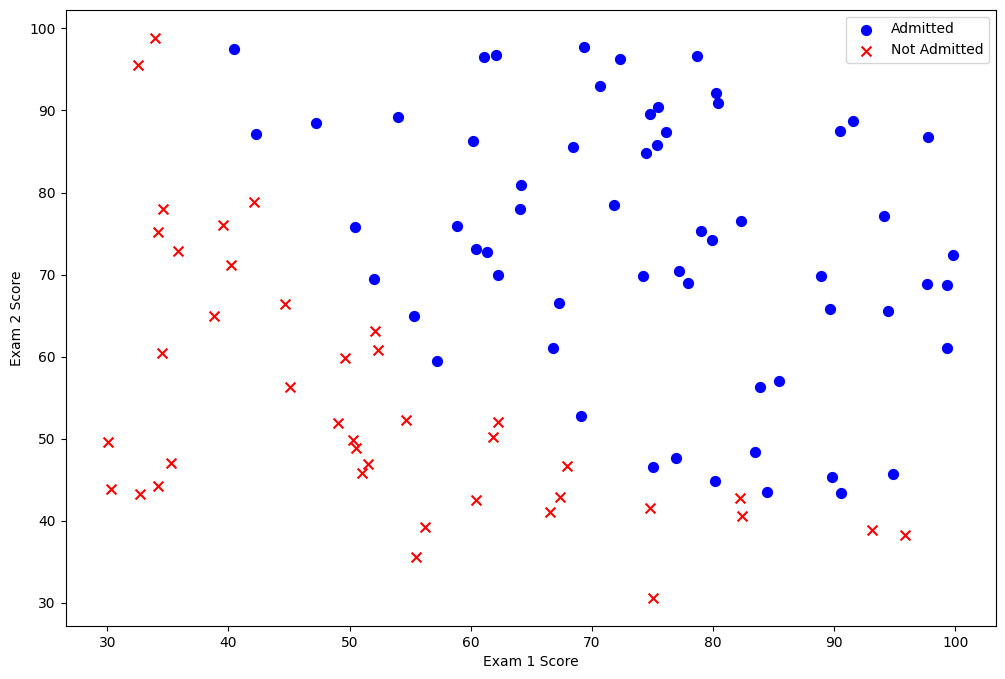

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s = 50,c = 'b',marker = 'o',label = 'Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s = 50,c = 'r',marker = 'x',label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [4]:
def sigmoid(z):
  return 1 /(1 + np.exp(-z))

In [10]:
def cost(theta,X,y):
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  first = np.multiply(-y,np.log(sigmoid(X * theta.T)))
  second = np.multiply((1 - y),np.log(1 - sigmoid(X * theta.T)))

  return np.sum(first - second) / (len(X))

In [6]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [7]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

X = np.array(X.values)
y = np.array(y.values)

In [11]:
cost(theta, X, y)

0.6931471805599453

In [12]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args = (X,y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [13]:
cost(result[0],X,y)

0.20349770158947447

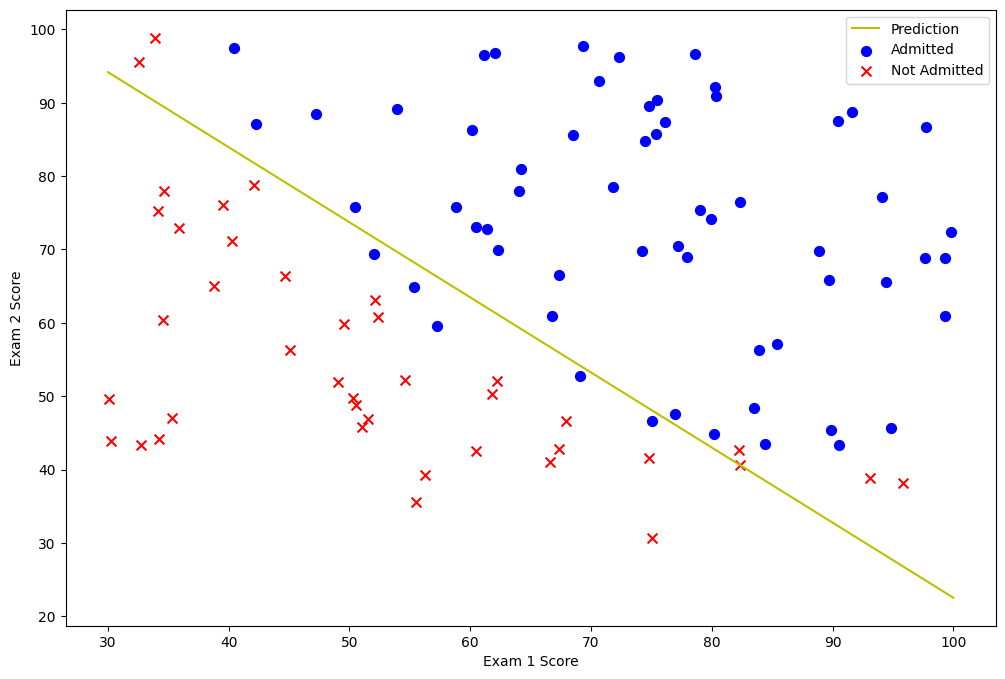

In [14]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [15]:
def hfunc1(theta, X):
  return sigmoid(np.dot(theta.T,X))

In [17]:
#测试exam1为40分，exam2为90分的学生被录取的概率
hfunc1(result[0],[1,40,90])

0.7721301819465891

In [18]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [19]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

